In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### loading the data

In [47]:
data=pd.read_csv(r"C:\Users\etisalat\Downloads\Salary_Data.csv")

In [138]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


### split the data into (x) and (y)

In [37]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [38]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [39]:
x.ndim

2

In [40]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [41]:
y.ndim # we notice that y is having single Dim.

1

### spliting the data into training and testing

In [45]:
from sklearn.model_selection import train_test_split

In [80]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123)

In [81]:
xtrain

array([[ 8.2],
       [ 5.9],
       [ 2.2],
       [ 2. ],
       [ 8.7],
       [ 5.1],
       [ 4.5],
       [ 6.8],
       [ 3.7],
       [ 4.9],
       [ 9. ],
       [ 1.1],
       [ 1.3],
       [ 7.9],
       [ 3.9],
       [ 6. ],
       [ 5.3],
       [ 3. ],
       [10.3],
       [ 1.5],
       [ 4.1]])

In [82]:
xtest

array([[ 3.2],
       [10.5],
       [ 2.9],
       [ 9.5],
       [ 3.2],
       [ 9.6],
       [ 4. ],
       [ 7.1],
       [ 4. ]])

In [83]:
ytrain

array([113812.,  81363.,  39891.,  43525., 109431.,  66029.,  61111.,
        91738.,  57189.,  67938., 105582.,  39343.,  46205., 101302.,
        63218.,  93940.,  83088.,  60150., 122391.,  37731.,  57081.])

In [84]:
ytest

array([ 54445., 121872.,  56642., 116969.,  64445., 112635.,  56957.,
        98273.,  55794.])

### Create LR model

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
model=LinearRegression()

In [87]:
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
xtest

array([[ 3.2],
       [10.5],
       [ 2.9],
       [ 9.5],
       [ 3.2],
       [ 9.6],
       [ 4. ],
       [ 7.1],
       [ 4. ]])

In [100]:
ypred=model.predict(xtest)

### compare the test result with actual results

In [93]:
data2=pd.DataFrame(xtest,columns=["xtest"])

In [101]:
data2["y-pred"]=ypred

In [102]:
ytest

array([ 54445., 121872.,  56642., 116969.,  64445., 112635.,  56957.,
        98273.,  55794.])

In [103]:
data2["yi"]=ytest

In [104]:
data2

,xtest,y-pred,yi
0,3.2,55963.815401,54445.0
1,10.5,126062.519563,121872.0
2,2.9,53083.046737,56642.0
3,9.5,116459.957349,116969.0
4,3.2,55963.815401,64445.0
5,9.6,117420.213571,112635.0
6,4.0,63645.865172,56957.0
7,7.1,93413.808036,98273.0
8,4.0,63645.865172,55794.0


### Evaluation metrics

In [105]:
model.intercept_

25235.616316676256

In [106]:
model.coef_

array([9602.56221394])

In [107]:
# y=25235.6 + 9602.56 x

In [108]:
from sklearn.metrics import mean_squared_error

In [117]:
ytest

array([ 54445., 121872.,  56642., 116969.,  64445., 112635.,  56957.,
        98273.,  55794.])

In [110]:
mean_squared_error(ytest,ypred)

28625082.09116316

In [113]:
model.score(xtest,ytest)

0.963407053878536

### Visualization for training phase

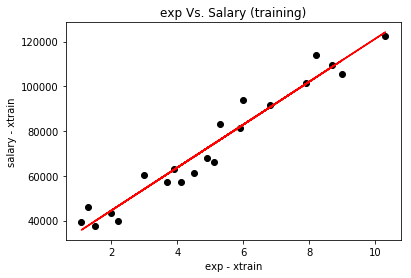

In [125]:
plt.scatter(xtrain,ytrain,c="black")
plt.plot(xtrain,model.predict(xtrain),c="r")
plt.title("exp Vs. Salary (training)")
plt.xlabel("exp - xtrain")
plt.ylabel("salary - xtrain")
plt.show()

### Visualization for Testing Phase

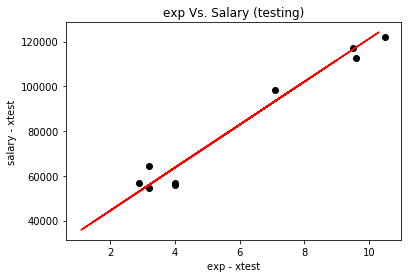

In [129]:
plt.scatter(xtest,ytest,c="black")
plt.plot(xtrain,model.predict(xtrain),c="r")
plt.title("exp Vs. Salary (testing)")
plt.xlabel("exp - xtest")
plt.ylabel("salary - xtest")
plt.show()

### predicting new values 

In [140]:
# please feed the new input data as a 2D array

In [139]:
model.predict([[15]])

array([169274.04952585])